In [1]:

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

# Import the pandas library
import pandas as pd

# Define the path to your dataset
file_path = '/Users/bengu/Desktop/CS210_project.csv'  

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to confirm successful loading
print(data.head())




            Timestamp      Name Surname  Age  \
0  1/19/2024 20:03:38  Ayşegül Akmandor   22   
1  1/19/2024 20:11:42         Deren Akı   22   
2  1/19/2024 20:11:42        Mert Koçak   23   
3  1/19/2024 20:11:58       Berk Yilmaz   22   
4  1/19/2024 20:13:06       Deniz Müjde   21   

                      What kind of films you prefer?  
0  comedy, Horror, action, science fiction, drama...  
1                                    science fiction  
2                                              drama  
3                                              drama  
4                 action, science fiction, animation  


In [13]:
# Understanding the Dataset

# 1. Shape of the dataset
dataset_shape = data.shape

# 2. Display variable names
variable_names = data.columns.tolist()

# 3. Summary of the dataset
dataset_summary = data.info()

# 4. First 5 rows of the dataset
first_five_rows = data.head()

dataset_shape, variable_names, first_five_rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Timestamp                       10 non-null     object
 1   Name Surname                    10 non-null     object
 2   Age                             10 non-null     int64 
 3   What kind of films you prefer?  10 non-null     object
 4   Number_of_Genres                10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


((10, 5),
 ['Timestamp',
  'Name Surname',
  'Age',
  'What kind of films you prefer?',
  'Number_of_Genres'],
             Timestamp      Name Surname  Age  \
 0  1/19/2024 20:03:38  Ayşegül Akmandor   22   
 1  1/19/2024 20:11:42         Deren Akı   22   
 2  1/19/2024 20:11:42        Mert Koçak   23   
 3  1/19/2024 20:11:58       Berk Yilmaz   22   
 4  1/19/2024 20:13:06       Deniz Müjde   21   
 
                       What kind of films you prefer?  Number_of_Genres  
 0  comedy, Horror, action, science fiction, drama...                 6  
 1                                    science fiction                 1  
 2                                              drama                 1  
 3                                              drama                 1  
 4                 action, science fiction, animation                 3  )

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Statistics for Age
age_stats = data['Age'].describe()

# Preprocessing film genre data for analysis
# Splitting the genres and flattening the list
all_genres = data['What kind of films you prefer?'].str.split(',').sum()

# Creating a DataFrame from the genres list for easier analysis
genres_df = pd.DataFrame({'Genre': all_genres})

# Count of unique genres
genre_counts = genres_df['Genre'].str.strip().value_counts()

# Display basic statistics and genre counts
age_stats, genre_counts.head(10)  # Displaying the top 10 genres for brevity


(count    10.000000
 mean     21.500000
 std       1.178511
 min      20.000000
 25%      20.250000
 50%      22.000000
 75%      22.000000
 max      23.000000
 Name: Age, dtype: float64,
 science fiction    6
 drama              5
 action             4
 animation          4
 comedy             2
 Horror             2
 Name: Genre, dtype: int64)

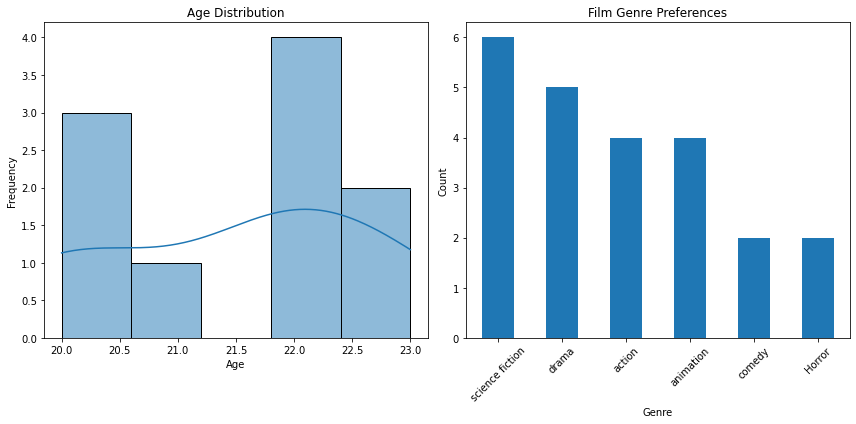

In [4]:
# Visualization Setup
plt.figure(figsize=(12, 6))

# Histogram for Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Bar Chart for Film Genre Preferences
plt.subplot(1, 2, 2)
genre_counts.plot(kind='bar')
plt.title('Film Genre Preferences')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


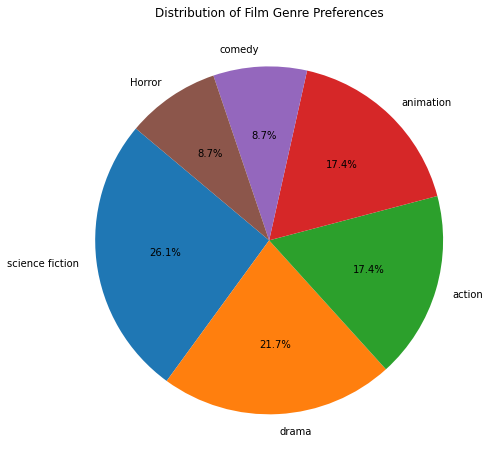

In [11]:
# Re-processing the data for the pie chart
# Splitting the genres and creating a list
all_genres_again = data['What kind of films you prefer?'].str.split(', ').sum()

# Counting the occurrence of each genre
genres_count = pd.Series(all_genres_again).value_counts()

# Creating a pie chart for film genres
plt.figure(figsize=(8, 8))
plt.pie(genres_count, labels=genres_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Film Genre Preferences')
plt.show()


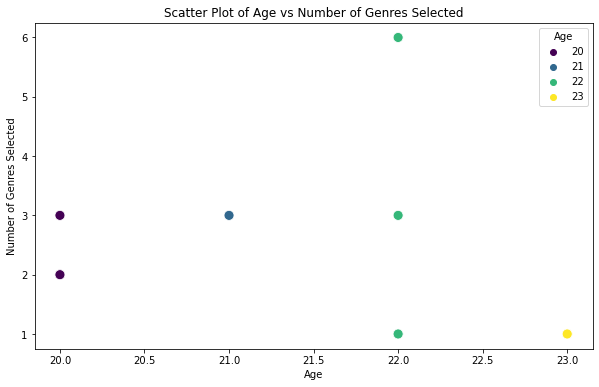

In [12]:
# Reprocessing data for the scatter plot
data['Number_of_Genres'] = data['What kind of films you prefer?'].apply(lambda x: len(x.split(', ')))
scatter_data_reprocessed = data[['Age', 'Number_of_Genres']]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data_reprocessed, x='Age', y='Number_of_Genres', hue='Age', palette='viridis', s=100)
plt.title('Scatter Plot of Age vs Number of Genres Selected')
plt.xlabel('Age')
plt.ylabel('Number of Genres Selected')

plt.show()


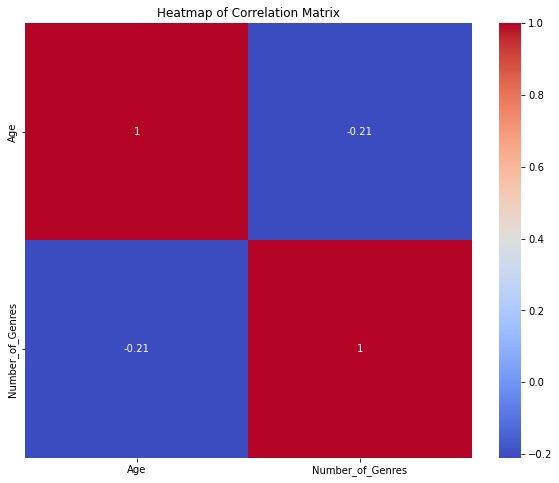

,Age,Number_of_Genres
Age,1.00000,-0.21058
Number_of_Genres,-0.21058,1.00000


In [14]:


# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Displaying the correlation matrix
correlation_matrix



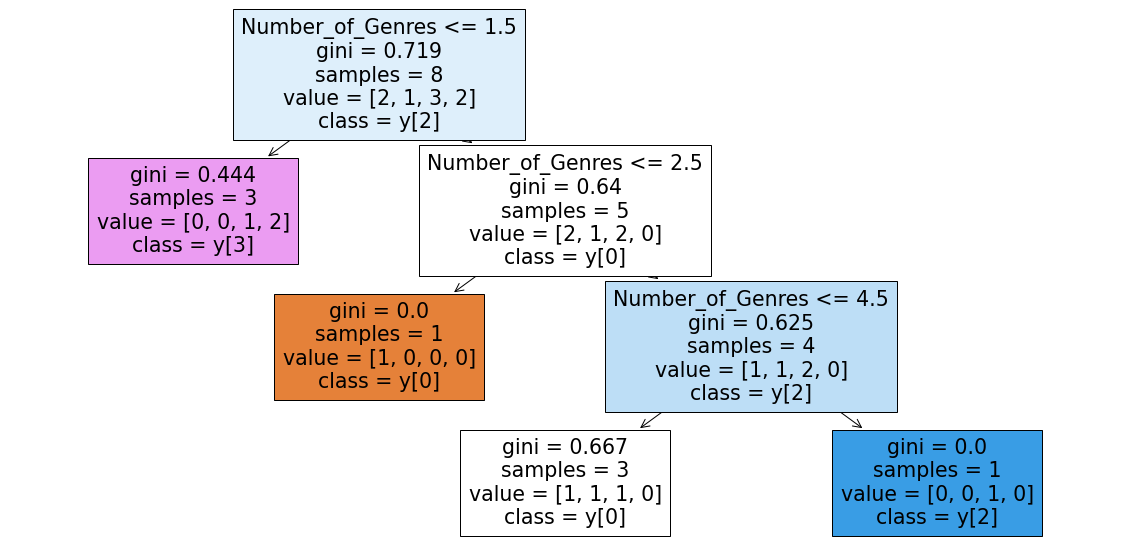

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# For demonstration, assuming 'Age' as the target and 'Number_of_Genres' as a feature
# Replace these with your actual target and features
X = data[['Number_of_Genres']]
y = data['Age']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with example hyperparameters
# Replace with your chosen hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Training the model
dt_classifier.fit(X_train, y_train)

# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=['Number_of_Genres'], class_names=True)
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Predicting the labels of the testing data
y_pred = dt_classifier.predict(X_test)

# Calculating the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy



0.5